In [1]:
## Introduction to SciKit-Learn (sklearn)
# This note book demonstrate some useful functions of sklearn library.

syllabls=[
    "0. an end-to-end SciKit-Learn workflow",
    "1. Getting data ready",
    "2. choose the right estimator/algorithm/model for our problems",
    "3. fit the model/algorithm/estimator and use it to make prediction on our data",
    "4. evaluate a model",
    "5. improve the model",
    "6. save and load a trained model",
    "7. putting it all together"
]

In [2]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 0. An end-to-end SciKit-Learn workflow

In [3]:
import numpy as np

In [4]:
# 1. getting the data raedy
import pandas as pd
heart_disease = pd.read_csv("../data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
# Create X (features metrix)
X = heart_disease.drop("target", axis=1)
# Create y (labels)
y = heart_disease["target"]

In [6]:
# we can use this package to ignoring any warning that we might have in our project
# import warnings
# warnings.filterwarnings("ignore")

In [7]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
# Keep the default hyperparamaters
clf.get_params() # these are hyperparamters for decision tree model

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [8]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [9]:
clf.fit(X_train, y_train);

In [19]:
# make a predictions
y_label = clf.predict(np.array([2,45,1,2,5])) # we can only make prediction with arrays that look like our train array

ValueError: Expected 2D array, got 1D array instead:
array=[ 2. 45.  1.  2.  5.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [20]:
y_preds = clf.predict(X_test)
y_preds

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1])

In [21]:
y_test

97     1
34     1
18     1
207    0
151    1
      ..
297    0
261    0
78     1
183    0
107    1
Name: target, Length: 61, dtype: int64

In [22]:
# 4. Evaluating the model on training data and test data
clf.score(X_train, y_train)

0.9710743801652892

In [23]:
clf.score(X_test, y_test)

0.9180327868852459

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91        29
           1       0.89      0.97      0.93        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



In [25]:
confusion_matrix(y_test, y_preds)

array([[25,  4],
       [ 1, 31]])

In [26]:
accuracy_score(y_test, y_preds)

0.9180327868852459

In [27]:
# 5. Improve our model
# try different amount of n_estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accurcy on test set: {clf.score(X_test, y_test) * 100:.2f}%")
    print("")

Trying model with 10 estimators...
Model accurcy on test set: 83.61%

Trying model with 20 estimators...
Model accurcy on test set: 86.89%

Trying model with 30 estimators...
Model accurcy on test set: 83.61%

Trying model with 40 estimators...
Model accurcy on test set: 85.25%

Trying model with 50 estimators...
Model accurcy on test set: 83.61%

Trying model with 60 estimators...
Model accurcy on test set: 78.69%

Trying model with 70 estimators...
Model accurcy on test set: 85.25%

Trying model with 80 estimators...
Model accurcy on test set: 83.61%

Trying model with 90 estimators...
Model accurcy on test set: 83.61%



In [28]:
# 6. Save a model and load it
import pickle
pickle.dump(clf, open("random-forest-model-1.pkl",'wb'))

In [29]:
loaded_model = pickle.load(open("random-forest-model-1.pkl", 'rb'))
loaded_model.score(X_test, y_test)

0.8360655737704918

In [30]:
syllabls

['0. an end-to-end SciKit-Learn workflow',
 '1. Getting data ready',
 '2. choose the right estimator/algorithm/model for our problems',
 '3. fit the model/algorithm/estimator and use it to make prediction on our data',
 '4. evaluate a model',
 '5. improve the model',
 '6. save and load a trained model',
 '7. putting it all together']

# 1. Getting our data ready to be used in machine learning
Three main things we have to do:
    1. Split data into features and labels (usually 'X' & 'y')
    2. Filling (also called imputing) or disregarding missing values
    3. Converting non-numerical values to numerical values (also called feature encoding)

In [31]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [32]:
X = heart_disease.drop('target', axis=1)

In [33]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [34]:
y = heart_disease["target"]

In [35]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [36]:
# split data to training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [37]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

## 1.1 Converting to numeric dtypes

In [38]:
car_sales = pd.read_csv("../data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [39]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [40]:
# Split to X/y
X = car_sales.drop('Price', axis=1)
y = car_sales['Price']

In [41]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [42]:
y.head()

0    15323
1    19943
2    28343
3    13434
4    14043
Name: Price, dtype: int64

In [43]:
# Split training and testting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# build a machine learning model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

# fit the model
model.fit(X_train, y_train)

model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [44]:
# transform or convert values to numeric
from sklearn.preprocessing import OneHotEncoder # oneHot is a way to converting values to numeric types
from sklearn.compose import ColumnTransformer # it has used for performing modifiction to columns

categorical_features = ['Make', 'Colour', 'Doors'] # Doors are numerics but they are categorical.
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

#### ColumnTransformer(*args)
List of (name, transformer, columns) tuples specifying the transformer objects to be applied to subsets of the data.

In [45]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [46]:
# make a DataFrame from our transformed_Xs
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [47]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [48]:
# another way to transform values to numeric type with pandas function
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [49]:
# refit the model
np.random.seed(42)
# split training and testing data from transformed data
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size = 0.2)
# fit model
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.3235867221569877

### 1.2 What if there were some missing values?
1. Filling them with some values (also known as imputation)
2. Remove the samples without any values or with missing values.

In [50]:
# Import car sales missing data
car_sales_missing = pd.read_csv("../data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [51]:
# calc how many missing values it has
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [52]:
# split X, y
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [53]:
# Let's try and convert values to numeric
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                  one_hot,
                                  categorical_features)],
                                  remainder = 'passthrough')
transformed_X = transformer.fit_transform(X)
transformed_X

ValueError: Input contains NaN

So we have to fix our missing data first the try for builiding our model

In [54]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [55]:
car_sales_missing['Doors'].value_countsnts()

AttributeError: 'Series' object has no attribute 'value_countsnts'

### Option1: Fill missing data with Pandas

In [56]:
# Fill missing values of 'Make' columns
car_sales_missing['Make'].fillna('misssing', inplace = True)

# Fill missing values of 'Colour'
car_sales_missing['Colour'].fillna('missing', inplace = True)

# Fiil missing values of 'Odometer (KM)' columns
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(), inplace = True)

# Fill missing values of 'Doors' columns
car_sales_missing['Doors'].fillna(4, inplace = True)

In [57]:
# check our dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

Now we should remove rows which its Price values missed. because 'Price' is label and we need it to predict so the rows without 'Price' values will be useless for us

In [58]:
car_sales_missing.dropna(inplace = True)

In [59]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [60]:
len(car_sales_missing)

950

Now we try again for building model

In [61]:
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [62]:
# split X, y
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [63]:
# convert values to numeric type and build our model
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                  one_hot,
                                  categorical_features)],
                                  remainder = 'passthrough')
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2: Fill missing values with Sci-Kit-Learn

The main takeways:
 * split your data first (into test/train)
 * Fill/transform training and testing sets seprately. 

In [64]:
# import car sales 
car_sales_missing = pd.read_csv("../data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [65]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [66]:
# drop columns without 'Price' values
car_sales_missing.dropna(subset= ['Price'], inplace=True)

In [67]:
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [68]:
# split X, y
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [69]:
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [70]:
# split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [71]:
X_train.isna().sum(), X_test.isna().sum()

(Make             39
 Colour           39
 Odometer (KM)    30
 Doors            38
 dtype: int64,
 Make              8
 Colour            7
 Odometer (KM)    18
 Doors             9
 dtype: int64)

In [72]:
# Fill missing values with Sci-Kit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing', numerical values with mean
cat_imputer = SimpleImputer(strategy = "constant", fill_value = "missing")
door_imputer = SimpleImputer(strategy = "constant", fill_value = 4)
num_imputer = SimpleImputer(strategy = "mean")

# Define Columns
cat_features = ['Make','Colour']
door_features = ['Doors']
num_features = ['Odometer (KM)']

# Create an imputer (something that fills the missing value)
# We can name transformer as imputer
imputer = ColumnTransformer([
                                ("cat_imputer", cat_imputer, cat_features),
                                ("door_imputer", door_imputer, door_features),
                                ("num_imputer", num_imputer, num_features)
                                ])
# Fill transform data values for test and train sets
filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.fit_transform(X_test)

In [73]:
filled_X_train

array([['Toyota', 'Black', 4.0, 86696.0],
       ['Toyota', 'Black', 4.0, 20714.0],
       ['Toyota', 'White', 4.0, 134415.0],
       ...,
       ['Honda', 'Blue', 4.0, 224900.0],
       ['missing', 'White', 3.0, 19482.0],
       ['Honda', 'Blue', 4.0, 199833.0]], dtype=object)

In [74]:
# convert filled data to dataFrame
X_train = pd.DataFrame(filled_X_train, 
                       columns=['Make','Colour','Doors','Odometer (KM)'])
X_test = pd.DataFrame(filled_X_test,
                      columns=['Make','Colour','Doors','Odometer (KM)'])

In [75]:
X_train

,Make,Colour,Doors,Odometer (KM)
0,Toyota,Black,4,86696
1,Toyota,Black,4,20714
2,Toyota,White,4,134415
3,Toyota,Green,4,130710
4,Honda,White,4,145850
...,...,...,...,...
755,Nissan,Blue,4,111256
756,Honda,White,4,246079
757,Honda,Blue,4,224900
758,missing,White,3,19482


In [76]:
X_test.isna().sum(), X_train.isna().sum()

(Make             0
 Colour           0
 Doors            0
 Odometer (KM)    0
 dtype: int64,
 Make             0
 Colour           0
 Doors            0
 Odometer (KM)    0
 dtype: int64)

In [77]:
# Conver data to numerica values
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features =["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder = 'passthrough')

transformed_X_train = transformer.fit_transform(X_train)
transformed_X_test = transformer.fit_transform(X_test)
transformed_X_train.toarray()

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.66960e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.07140e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.34415e+05],
       ...,
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.24900e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.94820e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.99833e+05]])

In [78]:
# build our model and fit it
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
# fitting model
model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

0.10029498332004949

In [79]:
len(transformed_X_test.toarray())+len(transformed_X_train.toarray())

950

# 2. Choose the right estimator/algorithm/model for our problems.
SciKit-Learn uses estimator as another term for machine learning algorithm or model.
* Classification - predicting whether a sample is one thing or another.
* Regression - predicting a number.
Step 1: Check the map and choose a model according to what problem we have...https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

## 2.1 Pick a machine learning model for a regression problem

In [80]:
# Import boston housing datasets
from sklearn.datasets import load_boston

# Instantiate from boston
boston = load_boston()

# make dataframe from boston
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
# add target column
boston_df['target'] = pd.Series(boston['target']) # I use boston['target'] instead of pd.Series and it works but this way is better
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [81]:
# How many sample's?
len(boston_df)

506

Let's try Ridge model

In [82]:
# Import Ridge model for our regression problem
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# set random seed
np.random.seed(42)

# instantiate from ridge
model = Ridge()

# Split X, y
X = boston_df.drop('target', axis=1)
y = boston_df['target']

# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# fit the model
model.fit(X_train, y_train)

# Check model score
model.score(X_test, y_test)


0.6662221670168522

Now we want to try with SVR model...https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [83]:
# Import SVR model with kernel = linear because we want to solve a regression problem
from sklearn.svm import SVR

# Instantiate from model and fit it
svr = SVR(kernel = 'linear')
svr.fit(X_train, y_train)

# check the score
svr.score(X_test, y_test)

0.5986037082794649

Let's try Random Forest Regressor...https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [84]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# set random seed
np.random.seed(42)

# we don't need to split data because we've done it before...

rf = RandomForestRegressor()
# fit the model
rf.fit(X_train, y_train)
# check the model score
rf.score(X_test, y_test)

0.8922527442109116

## 2.2 Pick a machine learning model for a Classification problem
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [85]:
# Import heart_disease data frame
heart_disease = pd.read_csv("../data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Consulting the map and it refers us `LineareSVC`

In [86]:
# Import LinearSVC
from sklearn.svm import LinearSVC

# setup random seed
np.random.seed(42)

# Split X, y
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instantiate from our model and fit it.
clf = LinearSVC()
clf.fit(X_train, y_train)

# Check the model score
clf.score(X_test, y_test)

/home/kaen/Programs/miniconda3/envs/testEnv/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8688524590163934

In [87]:
heart_disease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

Try with Random Forest Classifier

In [88]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# set random seed
np.random.seed(42)

# split X, y
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instantiate model and fit it
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# check the score
clf.score(X_test, y_test)


0.8524590163934426

TidBit:
1. If you have structured data, use ensemble methods.
2. If you have unstructured data, use deep learning and transfer learning

### Random Forest model deep dive

These resources will help you understand what's happening inside the Random Forest models we've been using.

* [Random Forest Wikipedia](https://en.wikipedia.org/wiki/Random_forest)
* [Random Forest Wikipedia (simple version)](https://simple.wikipedia.org/wiki/Random_forest)
* [Random Forests in Python](http://blog.yhat.com/posts/random-forests-in-python.html) by yhat
* [An Implementation and Explanation of the Random Forest in Python](https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76) by Will Koehrsen

# 3. Fit the model/algorithm/estimator and use it to make prediction on our data
## 3.1 Fitting the model to data
Different names for:
* `X` = features, features variables, data
* `y` = labels, targets, target variables    

In [89]:
# Import RandomForestClassifier estimator
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# split X, y
X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

# split train, test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# instantiate model
clf = RandomForestClassifier()
# fit the model
clf.fit(X_train, y_train)

# check the score
clf.score(X_test, y_test)

0.8524590163934426

In [90]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [91]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

## 3.2 Making predictions using a machine learning model

Two ways to make prediction:
1. `predict()`
2. `predict_porba()`

In [92]:
# use a trained model to make predictions
clf.predict(np.array([1,2,5,4,6])) # it doesn't work

ValueError: Expected 2D array, got 1D array instead:
array=[1. 2. 5. 4. 6.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [93]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


Make prediction with `predict()`

In [94]:
# we have already a dataset that our model haven't seen it before
# So we try to predict with that dataset
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [95]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [96]:
# Compare predictions to truth labels for evaluating our model
y_preds = clf.predict(X_test)
np.mean(y_test == y_preds)

0.8524590163934426

In [97]:
clf.score(X_test, y_test)

0.8524590163934426

In [98]:
# another way
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

Make prediction with `predict_proba()`.

Probability estimates.
The returned estimates for all classes are ordered by the label of classes.

In [99]:
# predic_proba() returns probebilities of a classification label
clf.predict_proba(X_test[:5])
# it tells us how many percent whether a patient has heart_disease or not.

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [100]:
# compare with predict()
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

In [101]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


#### Making prediction with our Regression model
We try with Boston house data set

In [102]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [103]:
# Import RandomForestRegrassor model for our regression problem
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# set random seed
np.random.seed(42)

# Split X, y
X = boston_df.drop('target', axis=1)
y = boston_df['target']

# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# instatiate and fit the model
model = RandomForestRegressor().fit(X_train, y_train)

# make a prediction by predict()
y_preds = model.predict(X_test)

In [104]:
y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [105]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [106]:
# compare y_preds and y_test
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.136382352941176

the above method tells us each prediction has about 2.1 values difference with there real values.

# 4. Evaluate a mchine learning model
Tree ways for evaluating a SciKit-Learn model/esitmator
1. Estimator `score` method.
2. The `scoring` parameter.
3. Problem-specific metric functions.

### 4.1 Evaluating a model with the score method.

In [107]:
from sklearn.ensemble import RandomForestClassifier 

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_test, X_train, y_test, y_train = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier().fit(X_train, y_train)

In [108]:
clf.score(X_train, y_train)

1.0

In [109]:
clf.score(X_test, y_test)

0.7892561983471075

Let's try with regression...

In [110]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [111]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df['target']

X_test, X_train, y_test, y_train = train_test_split(X, y, test_size = 0.2)

model = RandomForestRegressor().fit(X_test, y_test)

In [112]:
model.score(X_test, y_test)

0.9763520974033731

In [113]:
model.score(X_train, y_train)

0.8654448653350507

The point of these step is that `score()` function is work different in different type of models

### 4.2 Evaluating a model using the `scoring` parameter

In [114]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier 

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_test, X_train, y_test, y_train = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier().fit(X_train, y_train)

In [115]:
clf.score(X_test, y_test)

0.7892561983471075

In [116]:
cross_val_score(clf, X, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

The details of its working mentioned in the notes.
It splits the data in the number of folds and evaluate the model.

In [117]:
# set the cv or folds
cross_val_score(clf, X, y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [118]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-folds cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

# Compare the two evaluation
clf_single_score, clf_cross_val_score

(0.7892561983471075, 0.8248087431693989)

In [119]:
# Default scoring parameter of classifier = mean accuracy
# clf.score()

In [120]:
# Scoring parameter set to None by default
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion metrix
4. Classification report

**Accuracy**

In [121]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [122]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y)

In [123]:
np.mean(cross_val_score)

0.8248087431693989

In [124]:
print(f"Heart Disease Cross-Val accuracy: {np.mean(cross_val_score) * 100:.2f}%")

Heart Disease Cross-Val accuracy: 82.48%


**Area under the reciever operating characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true positive rate (tpr) versus a model's false positive rate (fpr).

* True Positive = model predicts 1 when the truth is 1.
* False Positive = model predicts 1 when the truth is 0.
* True Negetive = model predicts 0 when the truth is 0".
* False Negetive = model predicts 0 when the truth is 1.

In [125]:
# Create X_test... etc.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [126]:
from sklearn.metrics import roc_curve
# fit the model
clf.fit(X_train, y_train)

# Make predictions with porbabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [127]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [128]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)
# Check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

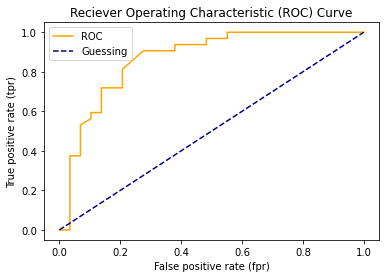

In [129]:
# Create a function for ploting ROC curves
import matplotlib.pyplot as plt
def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr) 
    and true positvie rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label = "ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    # customise the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Reciever Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [130]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

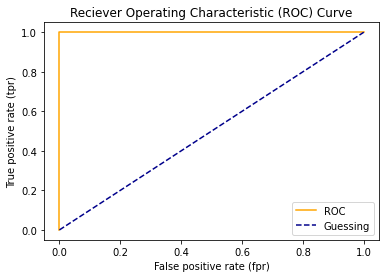

In [131]:
# Plot perfect ROC curve and AUC socre
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [132]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

**Confusion matrix**

A Confusion matrix is a quick way to compare the labels a model predicts and the actuallabels it was supposed to predict.

Inessence, giving you an idea of where the model is getting confused.

In [133]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]])

In [134]:
# Visualise confusion matirx with pd.crosstab()
pd.crosstab(y_test,
            y_preds,
            rownames=["Actual Labels"],
            colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


In [135]:
24 + 5 + 8 + 24

61

In [136]:
len(y_test)

61

In [137]:
# Install seaborn into the current environment
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



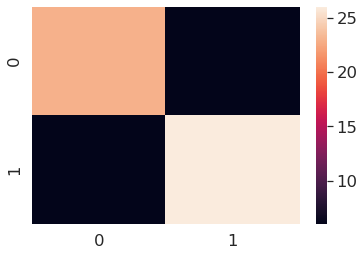

In [138]:
# Make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

# Set the font scale of heatmap
sns.set(font_scale=1.5)
# create a confusion matrix from our data
conf_matrix = confusion_matrix(y_test, y_preds)
# create seaborn's heatmap()
sns.heatmap(conf_matrix);

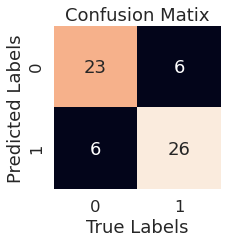

In [139]:
def plot_conf_matrix(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                     annot= True, # Annotate the boxes with conf_mat info
                     cbar= False)
    ax.set(title="Confusion Matix",
           xlabel="True Labels",
           ylabel="Predicted Labels")
    
plot_conf_matrix(conf_matrix)

**Classification Report**

In [140]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [141]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1

disease_preds = np.zeros(10000)

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True))

/home/kaen/Programs/miniconda3/envs/testEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarise classification metrics:

* **Accuracy**
is a good measure to starts with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).

* **Precision**
and **recall** become more important when classes are imbalanced.

* If false positive predictions are worse than false negatives, aim for higher precision.
* If false negative predictions are worse than false positives, aim for higher recall.
* **F1-score** is a comvination of precision and recall.

There's lots of way for evaluating classification models. Use the documentaion.

[Documentation](https://scikit-learn.org/stable/modules/model_evaluation.html)

### 4.2.2 Regression model evaluation metrics

Model evaluation metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html

1. R^2 (pronounced r-squared) or coefficient of determination.
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

**R^2**

What R-squared does: Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does, is predict the mean of the target, it's R^2 value would be 0. And if your model perfectly predicts a range of numbers, it's R^2 value would be 1.

In [142]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


model = RandomForestRegressor().fit(X_train, y_train)

model.score(X_test, y_test)

0.8654448653350507

In [143]:
# in action
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [144]:
y_test.mean()

21.488235294117644

In [145]:
r2_score(y_test, y_test_mean)

0.0

In [146]:
r2_score(y_test, y_test)

1.0

In [147]:
y_test[:10]

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
76     20.0
316    17.8
140    14.0
471    19.6
500    16.8
Name: target, dtype: float64

**Mean Absolute Error (MAE)**

In [148]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)

mae = mean_absolute_error(y_test, y_preds)
mae

2.136382352941176

In [149]:
df = pd.DataFrame(data={"Actual Values": y_test,
                   "Predicted Values": y_preds})
df["Differences"] = df["Predicted Values"] - df["Actual Values"]
df

,Actual Values,Predicted Values,Differences
173,23.6,23.081,-0.519
274,32.4,30.574,-1.826
491,13.6,16.759,3.159
72,22.8,23.460,0.660
452,16.1,16.893,0.793
...,...,...,...
412,17.9,13.159,-4.741
436,9.6,12.476,2.876
411,17.2,13.612,-3.588
86,22.5,20.205,-2.295


**Mean Squared Error (MSE)**

It squres the differences of actual values and predicted values then calcs their mean.

* **We have to minimise MAE and MSE, but we have to maximise R^2 value.**

In [150]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

9.867437068627442

In [151]:
# Calculate MSE by hand
squared = np.square(df["Differences"])
squared.mean()

9.867437068627442

### 4.2.3 Finally using `scoring` parameter

**Classification**

In [152]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

clf = RandomForestClassifier()

In [153]:
np.random.seed(42)
cross_acc = cross_val_score(clf, X, y, cv=5, scoring=None)
print(f'The accuracy of our model is : {np.mean(cross_acc) * 100:.2f}%')

The accuracy of our model is : 82.48%


In [154]:
# evalute with accuracy
np.random.seed(42)
cross_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
print(f'The accuracy of our model is : {np.mean(cross_acc) * 100:.2f}%')

The accuracy of our model is : 82.48%


The default evalute metrics for classification is accuracy.

In [155]:
# precesion
np.random.seed(42)
cross_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
np.mean(cross_precision)

0.8329547346025924

In [156]:
# recall
np.random.seed(42)
cross_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
np.mean(cross_recall)

0.8545454545454545

In [157]:
# f1-score
np.random.seed(42)
cross_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
np.mean(cross_f1)

0.8426854603423346

**Regression Model**

In [158]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop('target', axis=1)
y = boston_df['target']

model = RandomForestRegressor()

In [159]:
# evalute with default metrics
np.random.seed(42)
cross_default = cross_val_score(model, X, y, cv=5, scoring=None)
cross_default

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [160]:
# evaluate with r^2
np.random.seed(42)
cross_r2 = cross_val_score(model, X, y, cv=5, scoring = "r2")
cross_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [161]:
# Mean absolute error
np.random.seed(42)
cross_mae = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
cross_mae

array([-2.11419608, -2.58716832, -3.33976238, -3.78563366, -3.32941584])

In [162]:
# Mean squared error
np.random.seed(42)
cross_mse = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
np.mean(cross_mse)

-21.261442856882137

* **Higher return values are better than lower return values**

### 4.3 Using different evaluation metrics as Scikit-Learn functions

**Classification evaluation functions**

In [163]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make some predictions from our classificatio model
y_preds = clf.predict(X_test)

# Evaluate our model
print('The resault of our classifier evaluation')
print(f'Accuracy: {accuracy_score(y_test, y_preds) * 100:.2f}%')
print(f'Precision: {precision_score(y_test, y_preds)}')
print(f'Recall: {recall_score(y_test, y_preds)}')
print(f'F1: {f1_score(y_test, y_preds)}')

The resault of our classifier evaluation
Accuracy: 80.33%
Precision: 0.8125
Recall: 0.8125
F1: 0.8125


**Regression evaluation functions**

In [164]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = boston_df.drop('target', axis=1)
y = boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make some predictions
y_preds = model.predict(X_test)

# evaluate our regression model
print(f'The results of our evaluation')
print(f'R^2: {r2_score(y_test, y_preds)}')
print(f'MAE: {mean_absolute_error(y_test, y_preds)}')
print(f'MSE: {mean_squared_error(y_test, y_preds)}')

The results of our evaluation
R^2: 0.8917961354657971
MAE: 1.9377254901960794
MSE: 8.791721764705889


# 5. Improving a model

First predictions = baseline predictions.
First model = baseline model.

From a data perspective:
* Could we collect more data? (generally, the more data you have, the better model you have)
* Could we improve our data?

From a model perspective:
* Is there a better model we could use?
* Could we imporve the current model?

Hyperparameters vs. Parameters

* Parameters = model find these pattern in data
* Hyperparamters = setting on a model you can adjust to (potentially) improve its ability to find patterns.

Three ways to adjust hyperparamters:

1. By hand.
2. Randomly with RandomSearchCV
3. Exhustively with GridSearchCv

In [165]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [166]:
# Now how to get hyperparameters of a model
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## 5.1 Tuning hyperparameters by hand

Let's make 3 sets, training, validation and test.

There are differente hyperparameters for each model. For understanding what are they and how they are working we should read the documantaion.

But the common ones are:
* `max_depth`
* `max_features`
* `mean_samples_leaf`
* `mean_samples_split`
* `n_estimator` 

In [13]:
# first we create a function that compares our predictions with true labels.
def evaluate_preds(y_true, y_preds):
    '''
    Performs evaluation comparison on y_true labels vs. y_preds labels. on a classification model.
    '''
    
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {'accuracy': round(accuracy , 2),
                   'precision': round(precision, 2),
                   'recall': round(recall, 2),
                   'f1': round(f1, 2)}
    print(f'Accuracy: {accuracy * 100:.2f}%')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1: {f1:.2f}')
    
    return metric_dict

Now we have to split our data to train, test, valid. we couldn't use train_test_split() because it will split our data just into train and test. So we should split it by our own way.

In [14]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# split into X & y
X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

# split the data into train, test, validation
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of the data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of the data
# split the indexes
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

len(X_train), len(X_test), len(X_valid)

NameError: name 'heart_disease' is not defined

In [169]:
np.random.seed(42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Accuracy: 82.22%
Precision: 0.84
Recall: 0.84
F1: 0.84


{'accuracy': 0.82, 'precision': 0.84, 'recall': 0.84, 'f1': 0.84}

In [170]:
np.random.seed(42)
# Create a second classifier and tune hyperparamters

clf_2 = RandomForestClassifier(n_estimators=100, max_depth=10)
clf_2.fit(X_train, y_train)

# make predictions
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the 2nd classifier on validation set
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)
clf_2_metrics

Accuracy: 80.00%
Precision: 0.81
Recall: 0.84
F1: 0.82


{'accuracy': 0.8, 'precision': 0.81, 'recall': 0.84, 'f1': 0.82}

## 5.2 Tuning hyperparameters with RandomizedSearchCV

In [171]:
from sklearn.model_selection import RandomizedSearchCV

# Create grid of hyperparameters with different values as dictionary
grid = {'n_estimators': [10, 100, 200, 500, 1000, 1200],
        'max_depth': [None, 5, 10, 20, 30],
        'max_features': ['auto', 'sqrt'],
        'min_samples_split': [2, 4, 6],
        'min_samples_leaf': [1, 2, 4]}
# set random seed
np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

# split into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate from our classifier
clf = RandomForestClassifier(n_jobs=1) # n_jobs -> the number of jobs to run in a parallel

# instantiate from our RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10, # number of parameter setting that are sampled or number of models try
                            cv=5,
                            verbose=2)
# Fit the randomized model
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.6s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.1s
[CV] n_estimators=100, min_samples_split=4, min_samp

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.4s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.6s
[CV] n_estimators=1000, min_samples_split=4, min_s

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   27.5s finished


In [172]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [173]:
# make prediction with the best hyperparamters
rs_y_preds = rs_clf.predict(X_test)

# evaluate our best hyperparamters result
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Accuracy: 81.97%
Precision: 0.77
Recall: 0.86
F1: 0.81


## 5.3 Tuning hyperparameters with GridSearchCV

The difference of GridSearchCV and RandomizedSearchCv is that in RS we can choose the number of candidates or the range of our RS tries. But in GS it will tries all the possibilites times to folds. So we can't choose the number of tries. So the process of tuning will be so long and it will run out of our pc resources.

For solving this problem we can reduce the sample range of our grid. For example we can remove the samples which were the best of RS sample.

In [174]:
grid_2 = {'n_estimators': [100, 200, 500],
        'max_depth': [None],
        'max_features': ['auto', 'sqrt'],
        'min_samples_split': [6],
        'min_samples_leaf': [1, 2]}

In [175]:
# number of samples
3*1*2*1*2*5

60

In [176]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# split into X & y
X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

# split into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate our classifier
clf = RandomForestClassifier(n_jobs=1)

# instantiate our GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2,
                      cv=5,
                      verbose=2)
# fit the gridSerachCV model
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.3s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.9s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.7s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.7s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.8s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.8s
[CV] max_depth=None, max_features=

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   26.3s finished


In [177]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [178]:
# make prediction with our GS model
gs_y_preds = gs_clf.predict(X_test)

# evaluate GS
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Accuracy: 78.69%
Precision: 0.74
Recall: 0.82
F1: 0.78


Let's compare our model metrics by visualizing them.

1. Baseline
2. Tune by hand
3. RandomSearchCV
4. GridSearchCV

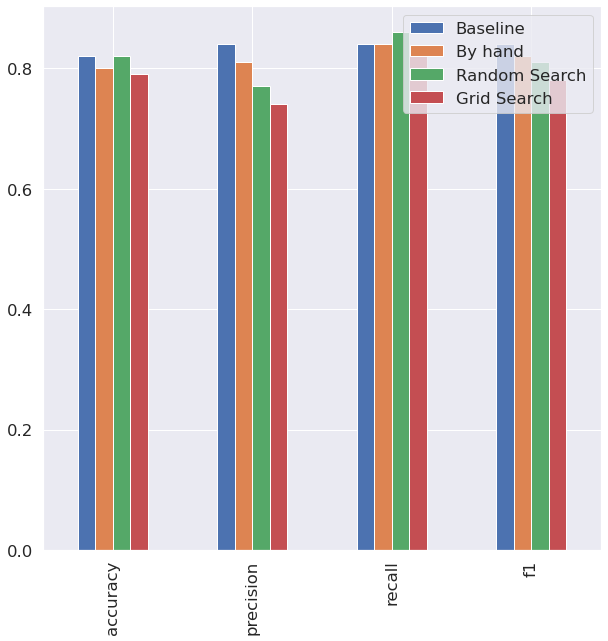

In [179]:
# make a data frame from our metrics
compare_metrics = pd.DataFrame({'Baseline': baseline_metrics,
                                'By hand': clf_2_metrics,
                                'Random Search': rs_metrics,
                                'Grid Search': gs_metrics})
# plot the compare metrics
compare_metrics.plot.bar(figsize=(10,10));

# 6. Save and Load trained machine learning models

Two ways to save and load machine learning models:
1. With Python's `pickle` module.
2. With the `joblib` module.

**Pickle**

The **Pickle** module implements binary protocols for serializing and de-serializing a Python object structure.

In [180]:
import pickle

# save an existing model to a file
pickle.dump(gs_clf,open('../data/gsrfcv.pkl', 'wb'))

In [181]:
# load a saved model
loaded_pickle_model = pickle.load(open('../data/gsrfcv.pkl', 'rb'))

In [182]:
# make prediction with our loaded model to be sure that it works correctly
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Accuracy: 78.69%
Precision: 0.74
Recall: 0.82
F1: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

**Joblib**

When our model is big and it carries large numpy arrays internally (has large patterns), it's more efficient to use joblib to export our model.

In [183]:
from joblib import dump, load

# save the model to file
dump(gs_clf,filename='../data/gsrfcv.joblib')

['../data/gsrfcv.joblib']

In [184]:
# import a saved joblib model
load_joblib_model = load('../data/gsrfcv.joblib')

In [185]:
# make prediction and evaluate
joblib_y_preds = load_joblib_model.predict(X_test)

evaluate_preds(y_test, joblib_y_preds)

Accuracy: 78.69%
Precision: 0.74
Recall: 0.82
F1: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

# 7. Putting it all together!

In [8]:
data = pd.read_csv("../data/car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [9]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [10]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do (all in one):
1. Fill missing data.
2. Convert data to numbers.
3. Build a model on our data.

In [15]:
# Getting our data ready
import pandas as pd
from sklearn.compose import ColumnTransformer # for applying transformers on a data frame or data
from sklearn.impute import SimpleImputer # for transforming data
from sklearn.preprocessing import OneHotEncoder # converting our categorical data to numeric
from sklearn.pipeline import Pipeline

# Get ready for builidng model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# set random seed
import numpy as np
np.random.seed(42)

# import data and drop rows without label
data = pd.read_csv('../data/car-sales-extended-missing-data.csv')
data.dropna(subset=['Price'], inplace=True)

# fill missing values of features
categorical_features = ['Make', 'Colour']
categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])
door_feature = ['Doors']
door_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value=4))])

num_features = ['Odometer (KM)']
num_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean'))])
    
# create preprocessor for applying tranformers
preprocessor = ColumnTransformer(transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('door', door_transformer, door_feature),
        ('num', num_transformer, num_features)])
# build a model
model = Pipeline([('preprocessor', preprocessor),
                 ('model', RandomForestRegressor())])
# split data
X = data.drop('Price', axis = 1)
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# fitting model and scoring
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

Use `GridSearchCV` and `RandomSearchCV` for `Pipeline`

In [19]:
from sklearn.model_selection import GridSearchCV
# create a grid
pipe_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'model__n_estimators': [100, 1000],
    'model__max_depth': [None, 5],
    'model__max_features': ['auto'],
    'model__min_samples_split': [2, 4]
}
gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_test, y_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto

[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean, total=   1.4s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean, total=   1.4s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features

[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   1.3s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   1.3s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   1.3s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, mod

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.0min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         